In [51]:

import nltk
import inflect
import contractions
from bs4 import BeautifulSoup
import re, string, unicodedata
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder 
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
import re
import numpy as np
from collections import Counter
from nltk import ngrams
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout, GlobalAveragePooling1D, Flatten, SpatialDropout1D, Bidirectional

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk

In [ ]:
df.isna().sum()

Title       0
Abstract    3
Label       0
dtype: int64

In [ ]:
#replace nan values and drop it and rename abstract and title 
df.replace("", float("NaN"), inplace=True)
df.dropna(inplace=True)
df.rename(columns = {"Abstract" : "text2", "Title":"text"},inplace = True)
df

text  \
0           Effect of edentulism on spirometric tests.   
1    Multiple Chronic Diseases Associated With Toot...   
2    Knowledge, attitudes and practices of patients...   
3    Asthma, chronic obstructive pulmonary disease,...   
4    A cohort study of the impact of tooth loss and...   
..                                                 ...   
124  Treatment of obstructive sleep apnea using an ...   
125  Management of obstructive sleep apnea in an ed...   
126  Treatment of obstructive sleep apnoea in edent...   
127                  Managing obstructive sleep apnea.   
128  Mandibular advancement combined with horizonta...   

                                                 text2  Label  
0    The impact of denture wear in edentulous subje...      1  
1    Half of US adults aged 20-64 years have lost a...      0  
2    Poor oral health is associated with worse clin...      0  
3    Adults with chronic respiratory conditions, sp...      0  
4    In COPD patients, fatal and non-fatal respirat...      0  
..                                                 ...    ...  
124  This paper reports on the case of an oral appl...      0  
125  Literature on the treatment of obstructive sle...      1  
126  This report describes the fabrication of a pro...      1  
127  Obstructive sleep apnea, cessation of breathin...      1  
128  Orthognathic surgical procedures have been use...      1  

[126 rows x 3 columns]

In [56]:
df = pd.read_csv("data.csv")
df.replace("", float("NaN"), inplace=True)
df.dropna(inplace=True)
df.rename(columns = {"Title":"text", 'Label' : 'label'},inplace = True)
df
df

text  label
0           Effect of edentulism on spirometric tests.      1
1    Multiple Chronic Diseases Associated With Toot...      0
2    Knowledge, attitudes and practices of patients...      0
3    Asthma, chronic obstructive pulmonary disease,...      0
4    A cohort study of the impact of tooth loss and...      0
..                                                 ...    ...
253  This paper reports on the case of an oral appl...      0
254  Literature on the treatment of obstructive sle...      1
255  This report describes the fabrication of a pro...      1
256  Obstructive sleep apnea, cessation of breathin...      1
257  Orthognathic surgical procedures have been use...      1

[255 rows x 2 columns]

In [57]:
#lowercase, remove special characters

def cleansing(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'/(?<!\S).(?!\S)\s*/', '', text)
    return text

In [58]:
df['text'] = df['text'].apply(cleansing)
df.head()

text  label
0          effect of edentulism on spirometric tests      1
1  multiple chronic diseases associated with toot...      0
2  knowledge attitudes and practices of patients ...      0
3  asthma chronic obstructive pulmonary disease t...      0
4  a cohort study of the impact of tooth loss and...      0

In [59]:
#remove stopwords 
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df

text  label
0                  effect edentulism spirometric tests      1
1    multiple chronic diseases associated tooth los...      0
2    knowledge attitudes practices patients healthc...      0
3    asthma chronic obstructive pulmonary disease t...      0
4    cohort study impact tooth loss periodontal dis...      0
..                                                 ...    ...
253  paper reports case oral appliance used treatme...      0
254  literature treatment obstructive sleep apnea e...      1
255  report describes fabrication prosthesis preven...      1
256  obstructive sleep apnea cessation breathing sl...      1
257  orthognathic surgical procedures used past tre...      1

[255 rows x 2 columns]

In [60]:
# lemmatize to base form of word 
tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    st = ""
    for w in tokenizer.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + " "
    return st
df['text'] = df.text.apply(lemmatize_text)
df

text  label
0                  effect edentulism spirometric test       1
1    multiple chronic disease associated tooth loss...      0
2    knowledge attitude practice patient healthcare...      0
3    asthma chronic obstructive pulmonary disease t...      0
4    cohort study impact tooth loss periodontal dis...      0
..                                                 ...    ...
253  paper report case oral appliance used treatmen...      0
254  literature treatment obstructive sleep apnea e...      1
255  report describes fabrication prosthesis preven...      1
256  obstructive sleep apnea cessation breathing sl...      1
257  orthognathic surgical procedure used past trea...      1

[255 rows x 2 columns]

In [ ]:
df.to_csv("clean_data.csv", index=False)

In [ ]:
df = pd.read_csv("clean_data.csv")
df

text  label
0                  effect edentulism spirometric test       1
1    multiple chronic disease associated tooth loss...      0
2    knowledge attitude practice patient healthcare...      0
3    asthma chronic obstructive pulmonary disease t...      0
4    cohort study impact tooth loss periodontal dis...      0
..                                                 ...    ...
250  paper report case oral appliance used treatmen...      0
251  literature treatment obstructive sleep apnea e...      1
252  report describes fabrication prosthesis preven...      1
253  obstructive sleep apnea cessation breathing sl...      1
254  orthognathic surgical procedure used past trea...      1

[255 rows x 2 columns]

In [61]:
def perform_oversampling(df):
    df_non = df[df['label'] == 0]
    df_exclude = df[df['label'] == 1]
    df_low_oversampled = df_exclude.sample(df_non.shape[0], replace=True)
    return pd.concat([df_low_oversampled, df_non], axis=0)

print('Original data:')
print(df['label'].value_counts())

df = perform_oversampling(df)

print('-'*10)
print('After oversampling:')
print(df['label'].value_counts())

Original data:
0    229
1     26
Name: label, dtype: int64
----------
After oversampling:
1    229
0    229
Name: label, dtype: int64


In [ ]:
df.to_csv("data1.csv", index=False)

In [62]:
text = df['text'].values
labels = df['label'].values

In [63]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], labels, test_size=0.2, random_state=434)

In [64]:
max_len = 50 
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' 
vocab_size = 500

In [65]:
#tokenizer to split sentences and encode to integers

tokenizer = Tokenizer(num_words = vocab_size, 
                      char_level = False,
                      oov_token = oov_tok)
tokenizer.fit_on_texts(x_train)

In [66]:
word_index = tokenizer.word_index
total_words = len(word_index)
total_words

2794

In [67]:
# sentence by sequence so that we have same length of each sequence
training_sequences = tokenizer.texts_to_sequences(x_train)
training_padded = pad_sequences(training_sequences,
                                maxlen = max_len,
                                padding = padding_type,
                                truncating = trunc_type)

In [68]:
testing_sequences = tokenizer.texts_to_sequences(x_test)
testing_padded = pad_sequences(testing_sequences,
                               maxlen = max_len,
                               padding = padding_type,
                               truncating = trunc_type)

In [69]:
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)

Shape of training tensor:  (366, 50)
Shape of testing tensor:  (92, 50)


In [70]:
vocab_size = 500 
embedding_dim = 16
drop_value = 0.2
n_dense = 24
n_lstm = 128
drop_lstm = 0.2

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(SpatialDropout1D(drop_lstm))
model.add(LSTM(n_lstm, return_sequences=False))
model.add(Dropout(drop_lstm))
model.add(Dense(1, activation='sigmoid'))

In [71]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 16)            8000      
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 50, 16)           0         
 lDropout1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, 128)               74240     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 82,369
Trainable params: 82,369
Non-trainable params: 0
__________________________________________________

In [72]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

In [73]:
from tensorflow.keras.callbacks import EarlyStopping

num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model.fit(training_padded,
                     y_train,
                     epochs=num_epochs, 
                     validation_data=(testing_padded, y_test),
                     callbacks =[early_stop],
                     verbose=2)

Epoch 1/30
12/12 - 3s - loss: 0.6911 - accuracy: 0.5273 - val_loss: 0.6902 - val_accuracy: 0.5761 - 3s/epoch - 210ms/step
Epoch 2/30
12/12 - 0s - loss: 0.6605 - accuracy: 0.6776 - val_loss: 0.7392 - val_accuracy: 0.5761 - 342ms/epoch - 29ms/step
Epoch 3/30
12/12 - 0s - loss: 0.5865 - accuracy: 0.7432 - val_loss: 0.5483 - val_accuracy: 0.6522 - 335ms/epoch - 28ms/step
Epoch 4/30
12/12 - 0s - loss: 0.4381 - accuracy: 0.8279 - val_loss: 0.3839 - val_accuracy: 0.8043 - 334ms/epoch - 28ms/step
Epoch 5/30
12/12 - 0s - loss: 0.3154 - accuracy: 0.8907 - val_loss: 0.2440 - val_accuracy: 0.9022 - 334ms/epoch - 28ms/step
Epoch 6/30
12/12 - 0s - loss: 0.1634 - accuracy: 0.9508 - val_loss: 0.1331 - val_accuracy: 0.9674 - 358ms/epoch - 30ms/step
Epoch 7/30
12/12 - 0s - loss: 0.0928 - accuracy: 0.9781 - val_loss: 0.1429 - val_accuracy: 0.9674 - 356ms/epoch - 30ms/step
Epoch 8/30
12/12 - 0s - loss: 0.1099 - accuracy: 0.9699 - val_loss: 0.1679 - val_accuracy: 0.9348 - 342ms/epoch - 29ms/step


In [74]:
model.save("lstm")

INFO:tensorflow:Assets written to: lstm\assets


INFO:tensorflow:Assets written to: lstm\assets


In [75]:
y_predict = np.where(model.predict(testing_padded)> 0.5,1,0)
print(classification_report(y_test, y_predict))

3/3 [==============================] - 1s 11ms/step
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        49
           1       0.88      1.00      0.93        43

    accuracy                           0.93        92
   macro avg       0.94      0.94      0.93        92
weighted avg       0.94      0.93      0.93        92



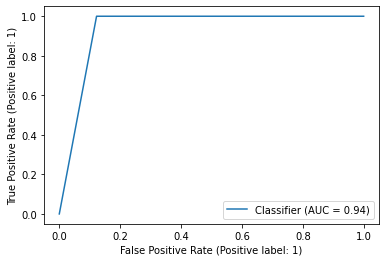

In [76]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_predict)

In [77]:
train_result = model.evaluate(training_padded, np.asarray(y_train), verbose=2, batch_size=256)
valid_result = model.evaluate(testing_padded, np.asarray(y_test), verbose=2, batch_size=256)
print(f'train accuracy: {train_result[1]*100:0.2f}')
print(f'valid accuracy: {valid_result[1]*100:0.2f}')

2/2 - 0s - loss: 0.0910 - accuracy: 0.9727 - 101ms/epoch - 51ms/step
1/1 - 0s - loss: 0.1679 - accuracy: 0.9348 - 41ms/epoch - 41ms/step
train accuracy: 97.27
valid accuracy: 93.48


In [109]:
prediction = model.predict(testing_padded[0:93])
print("prediction class:", prediction)
print("real:", y_test[0:93])

3/3 [==============================] - 0s 13ms/step
prediction class: [[0.03480905]
 [0.03292432]
 [0.0281099 ]
 [0.04143096]
 [0.02635244]
 [0.96617776]
 [0.02120807]
 [0.02222562]
 [0.9681808 ]
 [0.9552064 ]
 [0.9781268 ]
 [0.96617776]
 [0.9746234 ]
 [0.03408343]
 [0.02114494]
 [0.02653225]
 [0.9766453 ]
 [0.96608025]
 [0.9774432 ]
 [0.9774432 ]
 [0.03443589]
 [0.02346544]
 [0.14198458]
 [0.9781268 ]
 [0.02290362]
 [0.05357472]
 [0.02629892]
 [0.02020258]
 [0.9622765 ]
 [0.02937338]
 [0.02653226]
 [0.9758613 ]
 [0.96133226]
 [0.9567175 ]
 [0.96133226]
 [0.9656754 ]
 [0.03958885]
 [0.9766453 ]
 [0.03726787]
 [0.7978864 ]
 [0.96608025]
 [0.97385484]
 [0.96133226]
 [0.9570501 ]
 [0.9758613 ]
 [0.96745193]
 [0.9774432 ]
 [0.03403298]
 [0.0235985 ]
 [0.69575125]
 [0.96745193]
 [0.9753398 ]
 [0.03830447]
 [0.97497946]
 [0.9766453 ]
 [0.97385484]
 [0.02087593]
 [0.9500704 ]
 [0.9774432 ]
 [0.02251675]
 [0.05784645]
 [0.9753398 ]
 [0.06499103]
 [0.02259769]
 [0.9746234 ]
 [0.10841043]
 [0.97

In [105]:
yp = model.predict(testing_padded)
yp = (yp>0.5)
print(yp)

3/3 [==============================] - 0s 11ms/step
[[False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]]
